# Skopje Air Pollution

This project uses a dataset on air pollution for the city of Skopje, North Macedonia, that measures the hourly particle concentration in the air, expanding from the year 2008 to 2018. This project focuses on the time period concerning the winter seasons of the years between 2013 and 2018. The project aims to answer the following questions:

- Which have been the top 3 worst months overall?
- Which measuring station has the highest ratings on average?
- Make a pie chart with the average rating for each station
- Which is the worst month per measuring station on average? Is it the same for them all?
- Make a horizontal bar chart showing how many days in total the measurements have been over 50 for each.
- Same chart for over 200.

Pollution here is measured in PM10, or 10 micrograms per cubic meter.


## Loading and Checking the Data

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

skopje_data = pd.read_csv('pm10_data.csv')
skopje_data.head()

,A,B,C,D,E,G,time
0,NaN,NaN,NaN,NaN,NaN,120.26,2008-01-01 00:00:00
1,NaN,NaN,124.84,99.12,NaN,130.95,2008-01-01 01:00:00
2,NaN,NaN,107.64,98.37,NaN,130.19,2008-01-01 02:00:00
3,NaN,NaN,107.80,89.33,NaN,121.46,2008-01-01 03:00:00
4,NaN,NaN,100.65,94.35,NaN,103.99,2008-01-01 04:00:00


In [2]:
#Check 'time' variable data type
skopje_data['time'].dtype

dtype('O')

## Data Cleaning
The first thing to do is change the time column into a datetime type to make date searching and referencing easier.

In [3]:
#Change column to datetime data type
skopje_data['time'] = pd.to_datetime(skopje_data['time'])

#Filter yaers from november 2013 up
skopje_data_winters = skopje_data[skopje_data['time']>datetime.date(2013,11,1)]
#Filter months only November to February including February
skopje_data_winters = skopje_data_winters[(skopje_data_winters['time'].dt.month >= 11) | 
                    (skopje_data_winters['time'].dt.month <= 2)].reset_index(drop=True)

C:\Users\joman\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """


Now we check how many null values we have in all columns:

In [4]:
skopje_data_winters.isna().sum()

A        365
B       3453
C        527
D         90
E       1801
G        276
time       0
dtype: int64

We see a lot of null values. The following strategy will be implemented to deal with null values: since each value represents a different hour, each null value will be replaced by the average value registered for the same hour for the same month. For example, if there is a null value on November 3rd 2014 at 3pm, that null value will be replaced by the average of every 3pm value in November of every year.

In [5]:
#Group by month and hour to get average monthly values for the same hour
replacements = skopje_data_winters.groupby([skopje_data_winters['time'].dt.month,
                                            skopje_data_winters['time'].dt.hour]).mean().round(4)

In [6]:
#Create lists of average values for each station
temp_A = [replacements['A'].loc[n.month,n.hour] for n in skopje_data_winters['time']]
temp_B = [replacements['B'].loc[n.month,n.hour] for n in skopje_data_winters['time']]  
temp_C = [replacements['C'].loc[n.month,n.hour] for n in skopje_data_winters['time']] 
temp_D = [replacements['D'].loc[n.month,n.hour] for n in skopje_data_winters['time']]
temp_E = [replacements['E'].loc[n.month,n.hour] for n in skopje_data_winters['time']]
temp_G = [replacements['G'].loc[n.month,n.hour] for n in skopje_data_winters['time']]

In [7]:
#Replace all null values with the average values in the lists for each station
skopje_data_winters['A'] = np.where(skopje_data_winters['A'].isnull(),temp_A,skopje_data_winters['A'])
skopje_data_winters['B'] = np.where(skopje_data_winters['B'].isnull(),temp_B,skopje_data_winters['B']) 
skopje_data_winters['C'] = np.where(skopje_data_winters['C'].isnull(),temp_C,skopje_data_winters['C'])
skopje_data_winters['D'] = np.where(skopje_data_winters['D'].isnull(),temp_D,skopje_data_winters['D']) 
skopje_data_winters['E'] = np.where(skopje_data_winters['E'].isnull(),temp_E,skopje_data_winters['E'])
skopje_data_winters['G'] = np.where(skopje_data_winters['G'].isnull(),temp_G,skopje_data_winters['G'])

## Answering Questions about the Data
### Which have been the top 3 worst months overall?

In [8]:
#Group the null-free dataset by month (use datetime function strftime() with 
#argument '%B' to convert month number to month name)
month_group = skopje_data_winters.groupby(skopje_data_winters['time'].dt.strftime('%B')).median()
month_group

,A,B,C,D,E,G
time,,,,,,
December,130.12800,123.7720,119.18700,154.39500,67.21400,128.72000
February,64.90335,68.3645,58.71985,72.58495,44.63495,67.80995
January,116.04850,143.6150,110.02200,145.60500,84.76495,125.78890
November,76.77810,81.0566,73.40820,89.45000,53.24380,77.22000


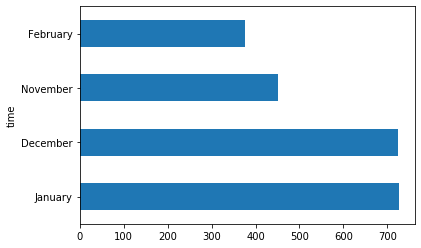

In [9]:
#Plot the results
pd.set_option('display.float_format', '{:.2f}'.format) #Use this to remove scientific notation from large numbers
top_months = month_group.sum(axis=1).sort_values(ascending=False)
top_months.plot.barh()
plt.show()

The three worst months summing total pollution across stations are January, December and November. In this the median was use to rank each month, but the mean yielded the same months.

### Which measuring station has the highest ratings on average?

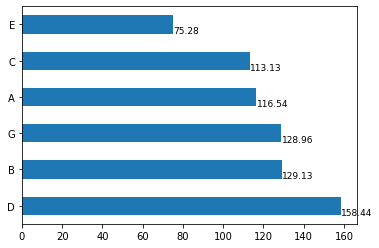

In [25]:
#Apply mean function to get the mean of each column
top_stations = skopje_data_winters[['A','B','C','D','E','G']].apply(np.mean).sort_values(ascending=False)

#Plot results
ax = top_stations.plot.barh()
for i in ax.patches:
        ax.annotate(str(round(i.get_width(),2)), (i.get_width(), i.get_y()),fontsize=9)
plt.show()

Measuring Station D has the highest ratings on average with 158.44 PM10.

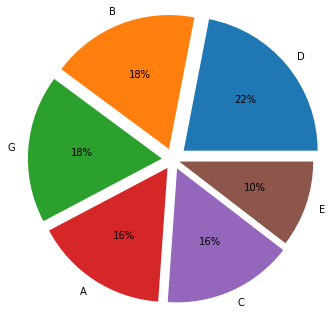

In [45]:
#Pie chart
explode = top_stations.values*.001
top_stations.plot.pie(explode=explode, autopct='%1.0f%%',radius=1.54)
plt.ylabel('')
plt.show()

### Which is the worst month per measuring station on average? Is it the same for them all?

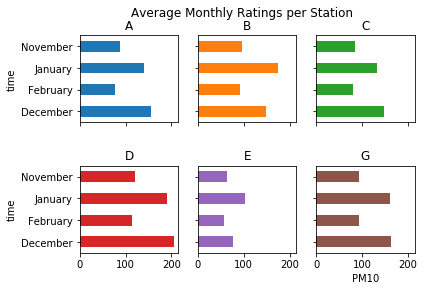

In [54]:
#Group by month name
top_station_months = skopje_data_winters.groupby(skopje_data_winters['time'].dt.strftime('%B')).mean()
#Plot
top_station_months.plot(kind='barh',subplots=True, layout=(2,3),
                        sharey=True,legend=False,title='Average Monthly Ratings per Station')
plt.subplots_adjust(hspace=0.5) #Adjust space between subplots
plt.xlabel('PM10')
plt.show()

We can see that January and December are both higher months on average for each station, with December being highest in all except for Stations 'B' and 'E' where January is higher.

### Make a horizontal bar chart showing how many days in total the measurements have been over 50 and over 200 for each.
The objective here is to measure the total amount of days that each station rated the air pollution over 50 PM10 and over 200 PM10 during the 5 winters.

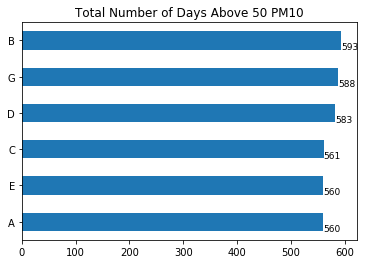

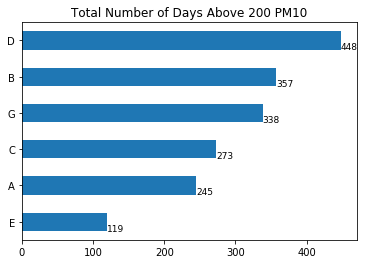

In [94]:
#Create a new dataframe with date as Index to make the counting easier
skopje_data_new_index = skopje_data_winters.set_index('time')

#Create a function to make it customizable to other thresholds
def number_of_days(df,columns,threshold):
    '''
    df: dataframe
    columns: columns to use from the dataframe
    threshold: PM10 limit 
    Returns nothing. It plots the results.
    '''
    #Filter values over the PM10 threshold
    over_thresh = df[df[columns]>threshold]
    #group values by year, month and day, each day will have up to 24 values
    over_thresh_group = over_thresh.groupby([over_thresh.index.year,
                                             over_thresh.index.month,over_thresh.index.day]).count()
    
    #Count all values whose count is greater than zero, meaning they had a 50 rating at least once during the day
    total_days = over_thresh_group[over_thresh_group[columns]>0].count().sort_values()
    ax = total_days.plot.barh()
    for p in ax.patches:
        ax.annotate(str(round(p.get_width(),2)), (p.get_width(), p.get_y()),fontsize=9)
    plt.title('Total Number of Days Above %d PM10'% threshold)
    plt.show()

    
#Use the function    
cols = ['A','B','C','D','E','G']
number_of_days(skopje_data_new_index,cols,50)
number_of_days(skopje_data_new_index,cols,200)

As the plots suggest station 'B' had the most number of days over 50 PM10 and station 'D' had most days over 200 PM10 during the 5 winters.